In [2]:
%matplotlib inline  
%matplotlib notebook
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def apply_kernel(data):
    x = data[:,0]
    y = data[:,1]
    z = np.power((x-y),2)
    z = z.reshape(-1,1)
    data = np.concatenate((data,z),1)
    return data

In [4]:
dat = np.array([[0,0], [0,1], [1,0], [1,1]])
X = apply_kernel(dat)
Y = np.array([0,1,1,0])
print("X (data points):")
print(X)
print("\nY (labels):")
print(Y.reshape(-1,1))

X (data points):
[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]

Y (labels):
[[0]
 [1]
 [1]
 [0]]


In [5]:
classifier = SVC(kernel='linear')
classifier.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

[[0. 0. 0.]
 [1. 1. 0.]
 [0. 1. 1.]
 [1. 0. 1.]]
-1.0 0.0 0.0 2.0


<IPython.core.display.Javascript object>


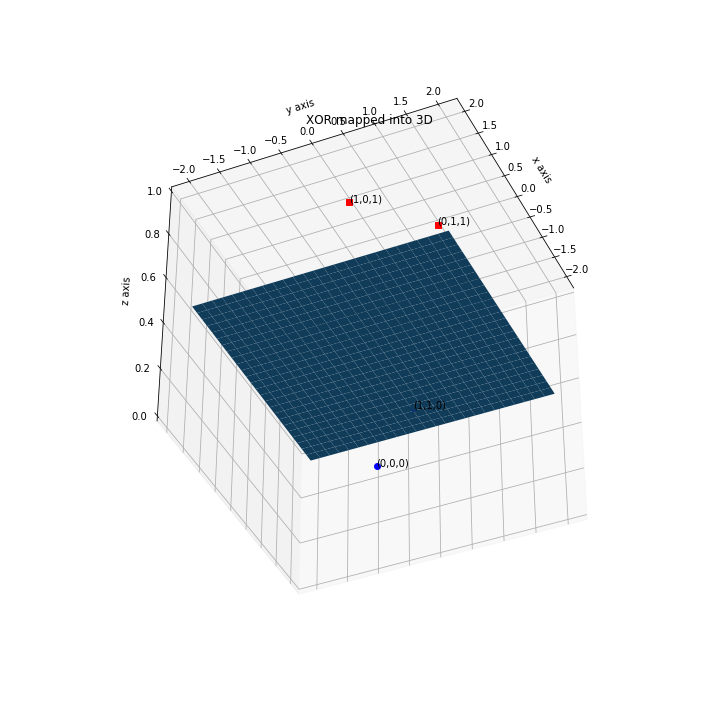

In [6]:
print(classifier.support_vectors_)
z = lambda x,y: (-classifier.intercept_[0]-classifier.coef_[0][0]*x-classifier.coef_[0][1]*y) / classifier.coef_[0][2]
print(classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1], classifier.coef_[0][2])
tmp = np.linspace(-2,2,51)
x,y = np.meshgrid(tmp,tmp)

# Plot stuff.
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z(x,y))
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_title('XOR mapped into 3D')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
for point in X:
    ax.text(point[0],point[1],point[2], "(%d,%d,%d)"%(point[0],point[1],point[2]))
plt.show()